# Insurance Customer Lifetime Value Prediction
Customer Lifetime Value atau Nilai Umur Panjang dari Pelanggan
- adalah angka yang menunjukan seberapa bernilainya pelanggan yang berdampak untuk umur panjang perusahaan.
- angka tersebut diperoleh berdasarkan perhitungan pada pemasukan uang yang diperoleh dari karyawan
- sehingga perusahaan lebih memahami pelanggan dan menggunakan cara terbaik agar pelanggan terus2an betah

```
Customer Lifetime Value = (Avg Sales x Num of Transaction x Retention Period) x Profit Margin
```

Terinspirasi dengan webinar jendela data mengenai penerapan customer lifetime value di Tokopedia 

dilatarbelakangi dari keingintahuan penerapan lifetime value lebih dalam pada usecase lain, 
- contohnya pada use case asuransi dengan data dari kaggle
- cara penerapan customer lifetime value pada nasabah asuransi seperti apa

DISCLAIMER:    
beberapa informasi detil pada business domain-nya dibantu Chat-GPT, meliputi
- pengertian Months Since Policy Inception
- nasabah latar pendidikan highschool or below education impact Customer Lifetime Value
- Nama-nama Polis seperti Corporate L3 L2 L1, Personal L3 L2 L1, dan Special L3 L2 L1
- Renew Offer Type dan Offer 1 Offer 2 Offer 3 Offer 4
- nasabah yang tinggal di Sub-urban dan Rural lebih tinggi Customer Lifetime Value nya
- Total Claim Amount berdampak Positif ke Customer Lifetime Value

apakah konsep dan metode dari usecase ini bisa diterapkan pada industri lain? 
- seperti industri hiburan misalnya pada JKT48 
    - bagaimana menghitung lifetime value dari Fans JKT48 pada kelangsungan JKT48 itu sendiri
- seperti industri usaha kecil seperti penjualan toko warung atau service otomotif  
    - bagaimana menghitung lifetime value dari pelanggan

## Pre-Requisites
import library yang diperlukan

In [1]:
# library untuk pengolahan dan visualisasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# library untuk preprocessing, pembagian data, hingga pengukuran model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# library untuk model machine learning
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# library untuk mengabaikan warnings, karena mengganggu tampilan pada hasil cell yang dijalankan
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

sudah ada 2 data yaitu data training untuk model training testing dan data production untuk model inference

In [2]:
# dataset for model training in development
usecase_df = pd.read_csv('squark_automotive_CLV_training_data.csv')
usecase_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274.0,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0.0,...,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767.0,...,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0.0,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836.0,...,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# liat jumalh baris dan kolom data
usecase_df.shape

(9134, 24)

In [4]:
# liat info dari dataset
usecase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   Customer Lifetime Value        8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

tidak ada data duplikat dr duplicated count

In [5]:
# cek data duplicate per baris
usecase_df[usecase_df.duplicated()].count()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

namun terdapat banyak data yang hilang pada tiap baris masing-masing 1035 baris

In [6]:
# cek jumlah data kosong perbaris
usecase_df.isnull().sum()

Customer                         1035
State                            1035
Customer Lifetime Value          1035
Response                         1035
Coverage                         1035
Education                        1035
Effective To Date                1035
EmploymentStatus                 1035
Gender                           1035
Income                           1035
Location Code                    1035
Marital Status                   1035
Monthly Premium Auto             1035
Months Since Last Claim          1035
Months Since Policy Inception    1035
Number of Open Complaints        1035
Number of Policies               1035
Policy Type                      1035
Policy                           1035
Renew Offer Type                 1035
Sales Channel                    1035
Total Claim Amount               1035
Vehicle Class                    1035
Vehicle Size                     1035
dtype: int64

## Data Cleansing
semua kolom jumlah null value nya sama, perlu diinspect dlu dengan `df[df.isnull == True]`

In [3]:
usecase_df[usecase_df.isnull()].head(50)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handling Missing Value
ternyata hampir semua isinya NaN semua, artinya semua isinya tidak valid 
- kemungkinan besar pilihannya dihapus

cek kondisi dari masing-masing value
- untuk yang kategorikal string, data null di replace pake "Unknown"
- untuk yang numerik float atau int, data null di replace pake 0

In [3]:
# menghapus data kosong berdasarkan baris
usecase_df.dropna(axis=0, how='any', inplace=True)

# coba di replace jadi 0 pada numerik (int dan float) dan 'Unknown' pada string kategorikal
# for col in usecase_df.columns:
#     if usecase_df[col].dtype == 'object' and col !='Effective to Date':
#         usecase_df[col].fillna('Unknown', inplace=True)
#     elif usecase_df[col].dtype == 'float64' or usecase_df[col].dtype == 'int64':
#         usecase_df[col].fillna(0, inplace=True)
#     elif col == 'Effective to Date': # format kolom mm/dd/yyyy
#         usecase_df['Effective to Date'].fillna('00/00/0000', inplace=True)

- Trial 1 : tanpa remove missing value dan y biasa (tanpa np.log) KEMUNGKINAN HANCUR PARAH KARENA MASALAH DI MODELING
- Trial 2 : dengan remove missing value dan y biasa (tanpa np.log) AKURASI MEMPRIHATINKAN (0.17, 0.11, 0.47, 0.7)
- Trial 3 : tanpa remove missing value dan y np.log HANCUR PARAH KARENA MASALAH DI MODELING
- Trial 4 : dengan remove missing value dan y np.log AKURASI LEBIH MENDINGAN (0.24, 0.23, 0.82, 0.91)

Outlier ternyata penting banget, jadinya makin ketauan & jelas distribusinya    
Outlier Handlingnya diganti jadi Remove Missing Value

In [8]:
# deskripsi statistik pada data numerik secara defaultnya
usecase_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000
mean,7981.271398,37843.544265,93.140758,15.071490,48.147549,0.389184,2.963823,431.464401
std,6847.287340,30370.556860,34.381153,10.086656,27.818744,0.914152,2.390357,286.706233
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3974.498315,0.000000,68.000000,6.000000,25.000000,0.000000,1.000000,269.484578
50%,5780.182197,34430.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.167471
75%,8963.294993,62459.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
# deskripsi statistik pada data kategorikal
usecase_df.describe(include='object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099,8099
unique,8099,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,Oregon,No,Basic,Bachelor,1/10/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,2475,6926,4931,2430,174,5079,4164,5098,4728,6053,3140,3324,3087,4110,5671


### Handling Outlier Value
Outlier tidak jadi dihapus karena penting banget, jadinya makin ketauan & jelas distribusinya    

mencari interquantile 
- umumnya q1 0.25 sedangkan q2 0.75, pd kasus ini q1 0.05 sedangkan q2 0.95 
- masing-masing variable kalikan quantilenya, dijalankan pada saat pengulangan

cappling outlier (metode cappling outlier)   
`np.where(df[var] > upper_quantile, upper_quantile, np.where(df[var] < lower_quantile, lower_quantile, df[var]))`

- boleh dicoba menghapus outlier untuk trial and error (sampai 4 trial)
- apabila performa kurang lebih baik ketika di trial error, atau data tidak karuan boleh dihapus 
- bandingkan masing2 masing performa model dari tiap Trial

In [23]:
# menghitung quantile 1 dan quantile 2
# def calculate_quantile(df, var, q1=0.05, q2=0.95):
#     # q1 untuk quantile lower, q2 untuk quantile upper
#     lower_quantile = df[var].quantile(q1)
#     upper_quantile = df[var].quantile(q2)
#     return lower_quantile, upper_quantile

# cappling outlier
# def cappling_outlier(df, var):
#     lower_quantile, upper_quantile = calculate_quantile(df, var)
#     # nested np.where (kondisi, true, false)
#     df[var] = np.where(df[var] > upper_quantile, upper_quantile, 
#                        np.where(df[var] < lower_quantile, lower_quantile, df[var]))  

### Data Type Transformation
- ada tipe data yang float sebaiknya jadi int, seperti : Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies
- Effective to Date merupakan kolom object datetime, sebaiknya diubah jadi datetime (to_datetime) 

kolom Customer valuenya bersifat Distinct semua krn jumlahnya sama dengan jumlah baris datanya

In [4]:
# transform effective to date dari object ke datetime
usecase_df['Effective To Date'] = pd.to_datetime(usecase_df['Effective To Date'])
# mengubah format tanggal dari mm/dd/yyyy menjadi dd/mm/yyyy
# mengubah format tanggal dari yyyy-mm-dd menjadi dd-mm-yyyy
usecase_df['Effective To Date'] = usecase_df['Effective To Date'].dt.strftime('%d/%m/%Y')

# transform months since last claim, months since policy inception, number of open complaints, number of policies 
for flocol in ['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']:
    # convert tipe data dari float ke integer
    usecase_df[flocol] = usecase_df[flocol].astype(int)

## Exploratory Data Analysis   

### Target Variabel Analysis
target kolom adalah **Customer Lifetime Value**
- yang merupakan nilai dari customer yang berdampak pada jangka panjang perusahaan atau bisnis 
- nilai dari jangka panjang dipengaruhi dari jumlah spent dari customer dan produk yang dibeli custoemr
- `np.log` sehingga semua isi value yang ditampilkan berdasarkan perhitungan logaritma (Practice dari Gojek Go-Home Case Study)

ternyata pada data ini kalau Customer Lifetime Value rata-rata berada dikisaran 2000 - 30000

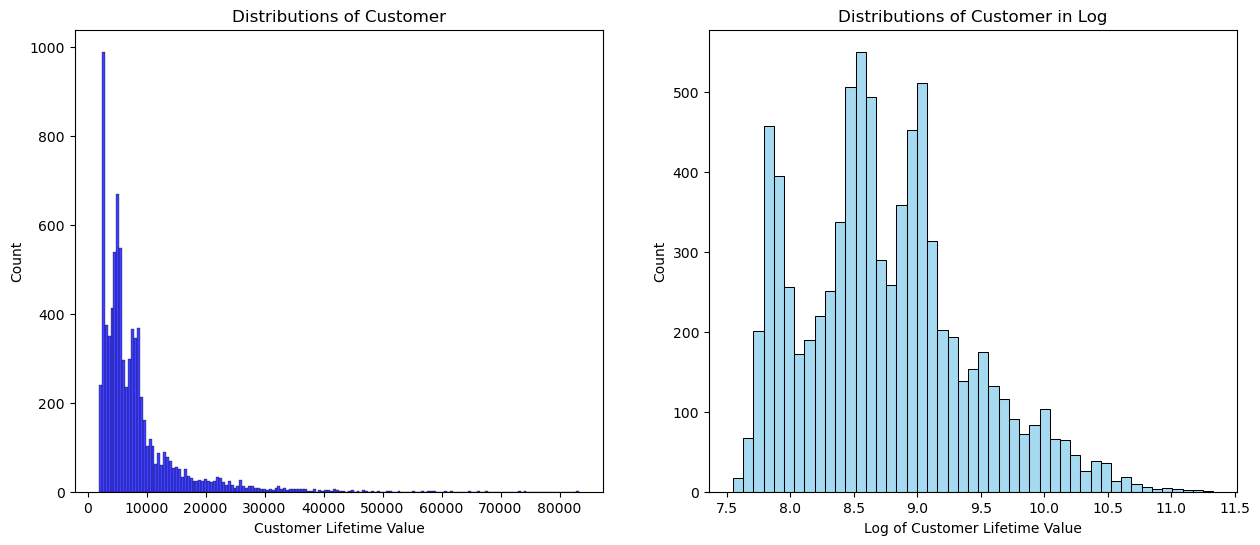

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
# Customer Lifetime Value Distribution, kemudian Customer Lifetime Value yang di logaritmakan
sns.histplot(usecase_df['Customer Lifetime Value'], color='blue', ax=axes[0])
sns.histplot(np.log(usecase_df['Customer Lifetime Value']), color='skyblue', ax=axes[1])
# logaritma 1p artinya log(x + 1)
# sns.histplot(np.log1p(usecase_df['Customer Lifetime Value']), color='teal', ax=axes[2])
axes[0].set_xlabel('Customer Lifetime Value')
axes[0].set_title('Distributions of Customer')
axes[1].set_xlabel('Log of Customer Lifetime Value')
axes[1].set_title('Distributions of Customer in Log')
# axes[2].set_xlabel('Log 1p of Customer Lifetime Value')
# axes[2].set_title('Distributions of Customer in Log 1p')
plt.show()

pembagian antara kategorikal dengan numerikal berdasarkan jumlah unique value    

In [5]:
numeric_columns = []
categ_columns = []

for col in usecase_df.columns:
    # semua kolom kecuali kolom customer, customer lifetiem value dan effective to date
    if col != 'Customer' and col != 'Customer Lifetime Value' and col != 'Effective To Date':
        # jumlah unique value dari kolom
        uniq_len = len(usecase_df[col].unique())
        # kolom yang unique value krg dr 10 kecuali kolom number of policies dan number of open complaints
        if uniq_len < 10 and col !='Number of Policies' and col != 'Number of Open Complaints':
            # print(col,'(Categorical) ', uniq_len)
            categ_columns.append(col)
        else:
            # print(col,'(Numerical) ', uniq_len)
            numeric_columns.append(col)

### Numerical Feature Analysis
numerikal (kecuali Customer Lifetime Value) menggunakan scatterplot
- distribusi income terhadap customer lifetime value tersebar secara merata, 
  - karena dari yang income terendah ampe income tertinggi hampir semuanya memberikan lifetime yang sama
  - uniknya yang incomenya menengah terdapat outlier yang bisa memberikan lifetime yang tertinggi
- distribusi monthly premium auto terhadap customer lifetime value sebagian besar berkorelasi positif
  - karena semakin banyaknya premium bulanan yang dibayar otomatis 
  - semakin memberikan lifetime melalui pemasukan terhadap perusahaan  
- distribusi months since last claim terhadap customer lifetime value tersebar secara merata 
  - karena jauh atau dekatnya waktu terakhir kali pengambilan polis, tidak mempengaruhi lifetime value
- distribusi months since policy inception terhadap customer lifetime value tersebar secara merata
  - karena lamanya perjanjian nasabah dengan penjamin asuransi tidak berpengaruh terhadap lifetime value
- distribusi number of open complaints terhadap customer lifetime value berkorelasi negatif
  - berdasarkan chart, semakin banyak customer complain maka berdampak negatif pada lifetime 
  - pada dasarnya complain merupakan masukan, atau juga keluhan
- distribusi number of policies terhadap customer lifetime value, kecuali 2 polis semuanya tersebar merata  
  - customer yang hanya memegang 2 polis justru malah berdampak positif terhadap lifetime value
  - dibanding yang memegang 1 polis atau lebih dari 3 polis tidak memberikan dampak apa2
  - asumsi kalau yang memegang polis semakin banyak, semakin banyak yang ditanggung penjamin 
- distribusi total claim amount terhadap customer lifetime value berkorelasi positif
  - banyaknya claim asuransi dari skala kecil hingga menengah memberikan dampak pada lifetime
  - dalam chart ini, jika semakin besar claimnya justru menurunkan customer lifetime pada perusahaan
  - karena yang ditanggung semakin besar

Istilah :
- Months Since Last Claim, bulan terakhir kali mengclaim asuransi
- Months Since Policy Inception, bulan awal dimulainya perjanjian antara nasabah dengan penjamin asuransi
- Policy artinya Polis

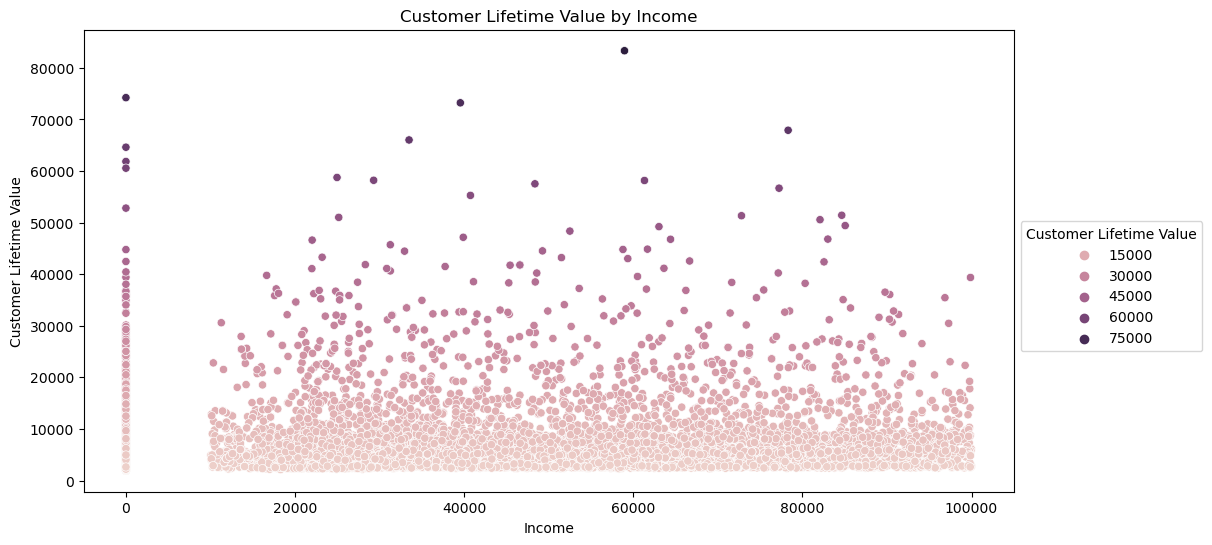

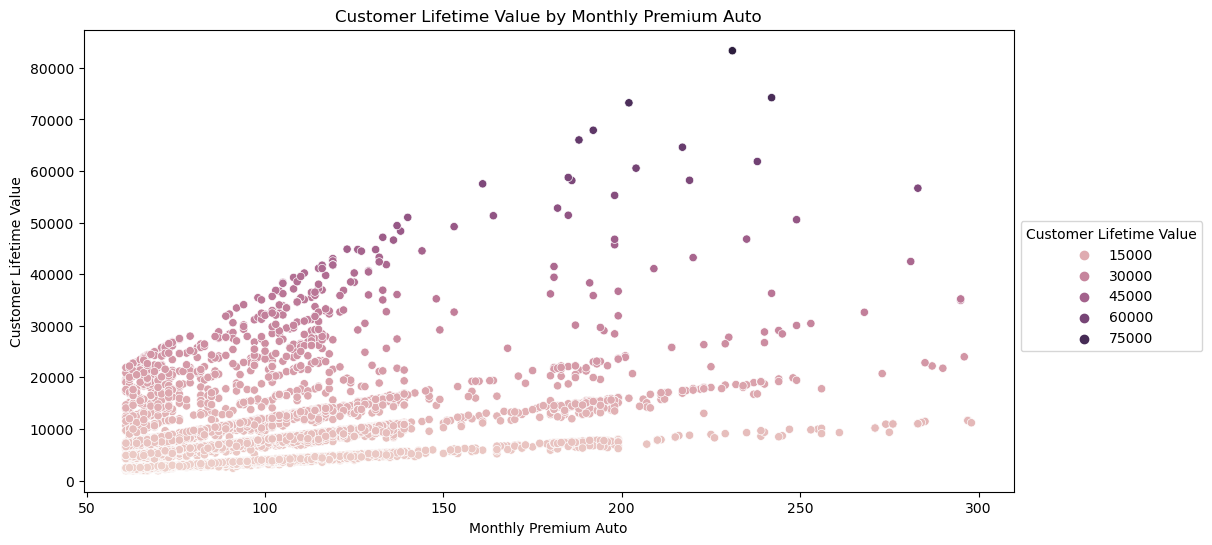

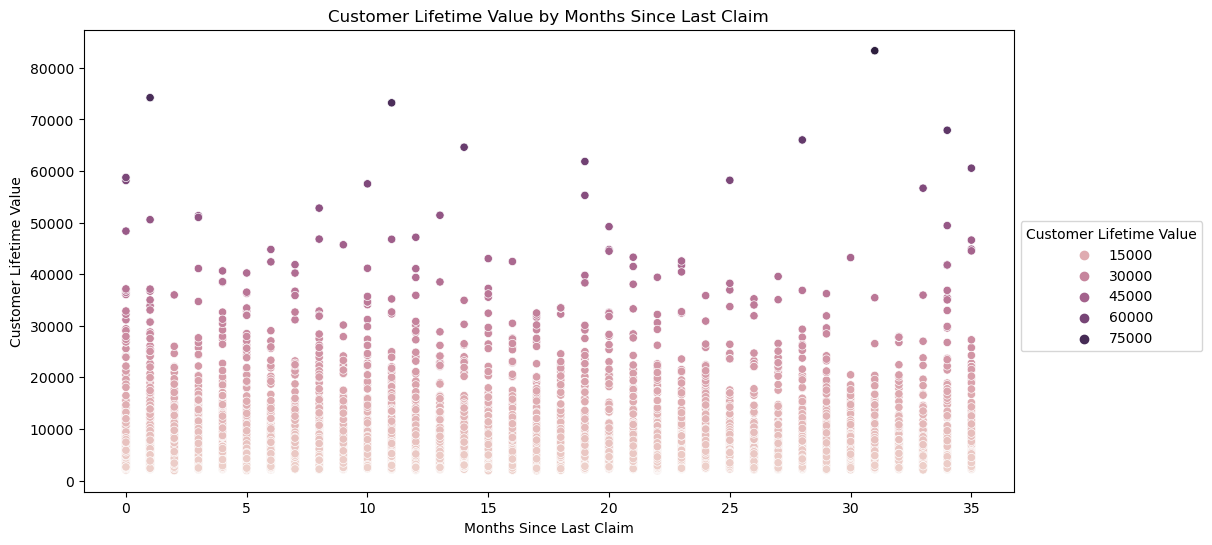

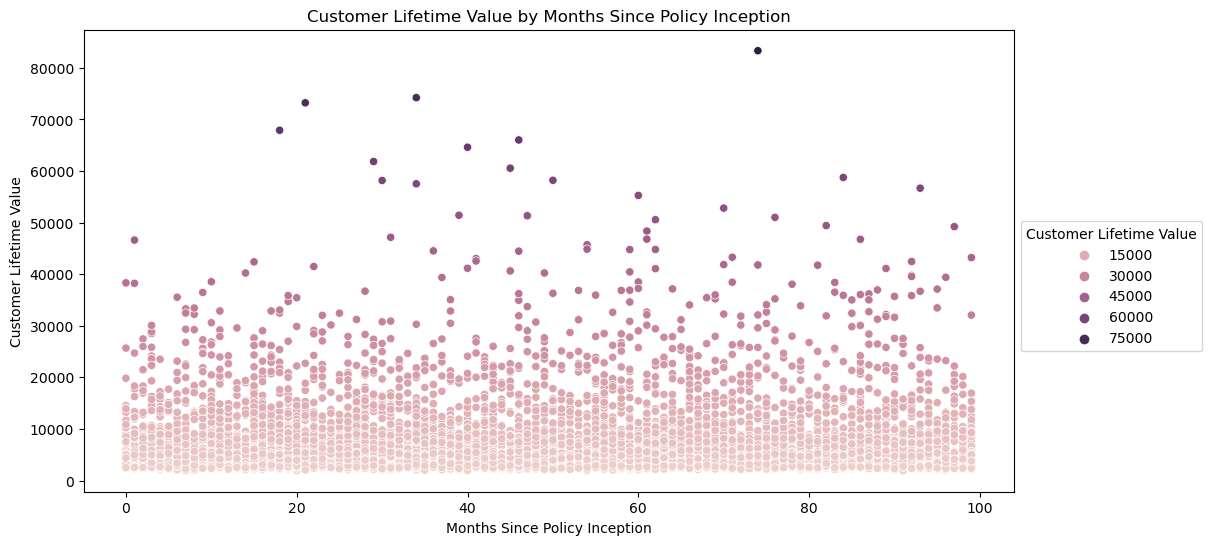

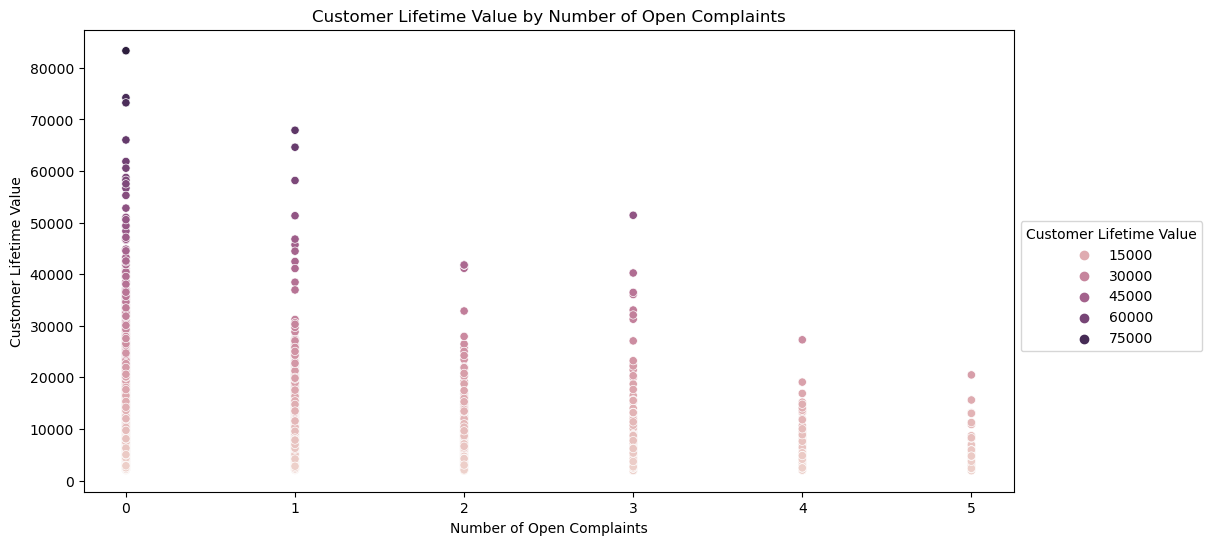

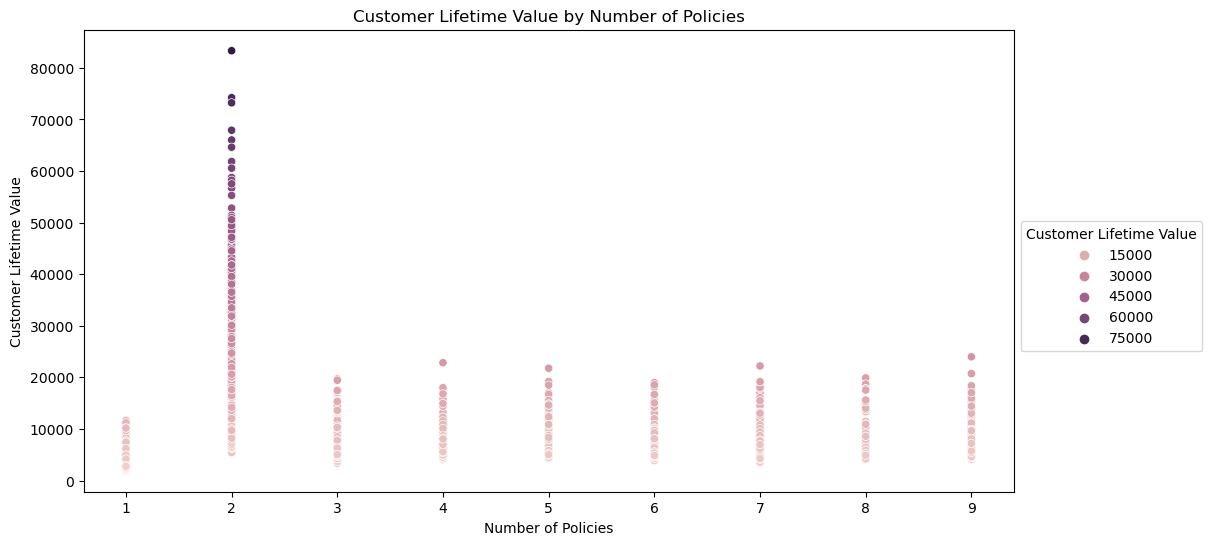

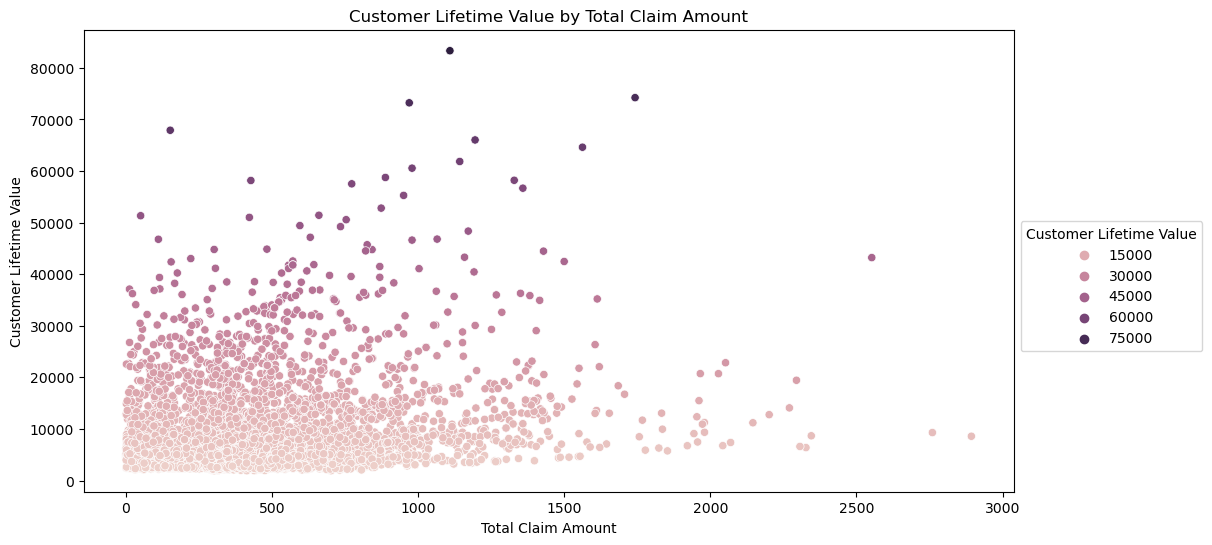

In [6]:
# iterate tiap kolom numerik
for numcol in numeric_columns:
    # visualisasi seaborn scatterplot antar kedua kolom numerik
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=numcol, y='Customer Lifetime Value', data=usecase_df, hue='Customer Lifetime Value')
    plt.title('Customer Lifetime Value by ' + numcol, fontsize=12)
    # menggunakan legenda yang ditaro luar chart dengan bbox_to_anchor
    plt.legend(loc='upper left', title='Customer Lifetime Value', bbox_to_anchor=(1,0.6))
    plt.show()

kategorikal (kecuali Customer, Effective to Date)
- 2-3 ada 7 masuk ke small category
- 4-9 ada 7 masuk ke big category

In [7]:
big_categ = []
small_categ = []

for categ in categ_columns:
    uniq_len = len(usecase_df[categ].unique())
    # untuk kategorikal yang unique value lebih dari 4
    if uniq_len >= 4:
        # print(categ, uniq_len, ' Big Categ')
        big_categ.append(categ)
    # untuk kategorikal yang unique value kurang dari 4
    else:
        # print(categ, uniq_len, ' Small Categ')
        small_categ.append(categ)

kategorikal (kecuali Customer, Effective to Date) menggunakan catplot, atau barplot atau boxplot
- berdasarkan daerah yang paling berdampak berasal dari oregon dan washington
- customer yang memberikan lifetime value sebagian besar berasal dari pendidikan Master
  - terdapat lulusan SMA atau dibawahnya yang juga memberikan lifetime value
  - Pelanggan yang setia dan cenderung bertahan walaupun pendapatannya lebih rendah, karena mungkin memiliki opsi yang lebih terbatas dan cenderung menetap dengan perusahaan yang sudah dikenal.
  - sedangkan yang berpendidikan lebih tinggi cenderung beralih ke penyedia asuransi lain yang penawarannya lebih baik
- untuk status pekerjaan, kebanyakan karyawan yang memberikan perpanjangan pada lifetime
  - karena mereka punya pemasukan, kemungkinan asuransi ini juga merupakan fasilitas dari perusahaan
  - makanya wajar saja keberadaan karyawan ini berdampak pada lifetime perusahaan
- selain itu ini nama2 polis yg disinggung, untuk istilahnya mohon maaf sy belum paham artinya
  - yang pasti polis yang dari Special L3 paling besar, diikuti Special L2 dan Corporate L1
  - semakin besar L nya khususnya di L3 maka semakin besar cakupan proteksi asuransinya, maka semakin besar bayran yang ditanggung nasabah
  - diasumsikan jika lifetime yang tertinggi berasal dari nasabah yang memerlukan proteksi tambahan pada kepemilikan mobil
- kemudian tipe renew offer type pada customer yang memberikan dampak pada jangka panjang perusahaan
  - kebanyakan customer yang berkontribusi pada lifetiem, itu dari tipe penawaran yang 1
  - untuk type nya sendiri mungkin dari penamaannya ada benefit dari tipe masing-masing2
  - untuk detil offer type 1 smapai 4 nya apa aja saya masih kurang tau pasti ya
- kelas kendaraan yang customer yang paling berdampak pada lifetime value, itu berasal dari Luxury SUV dan Luxury Car
  - kalau dr datanya, memang dr kepemilikan mobilnya

Istilah
- Renew Offer Type, tipe promo pembaruan   
  - pembaruan untuk nasabah mengubah jumlah uang yang dibayar sebelum polis baru dimulai   
  - mengacu pada jenis penawaran yang diberikan oleh penyedia asuransi pada pelanggan untuk memperbarui polis, 
  - biasanya diberikan promo penawaran seperti diskon premi, perlindungan tambahan atau bonus
- Special Auto, polis yang merujuk pada asuransi mobil yang disesuaikan, tergantung pemegang polisnya.    
  - polis special ini mencakup perlindungan tambahan selain polis mobil standar

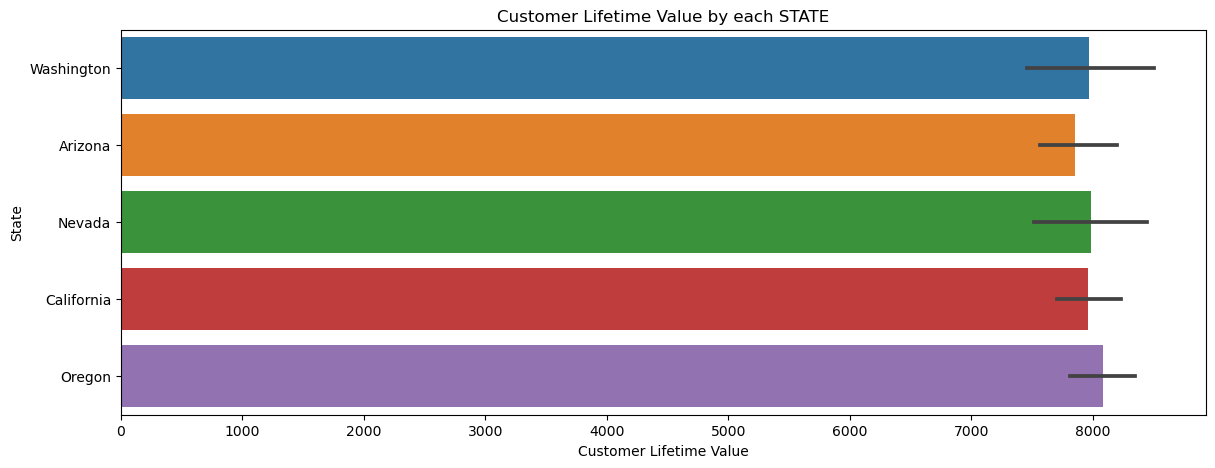

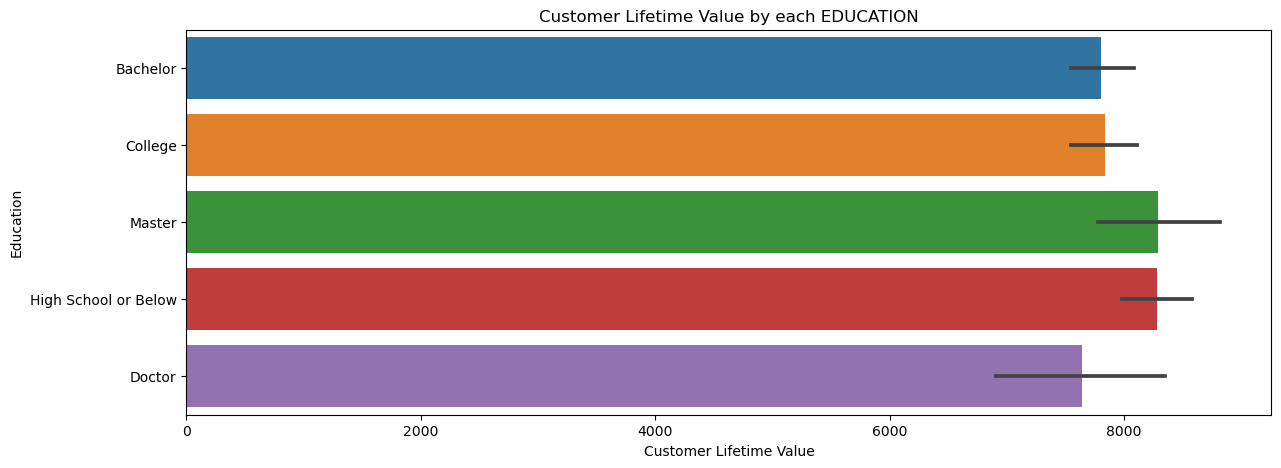

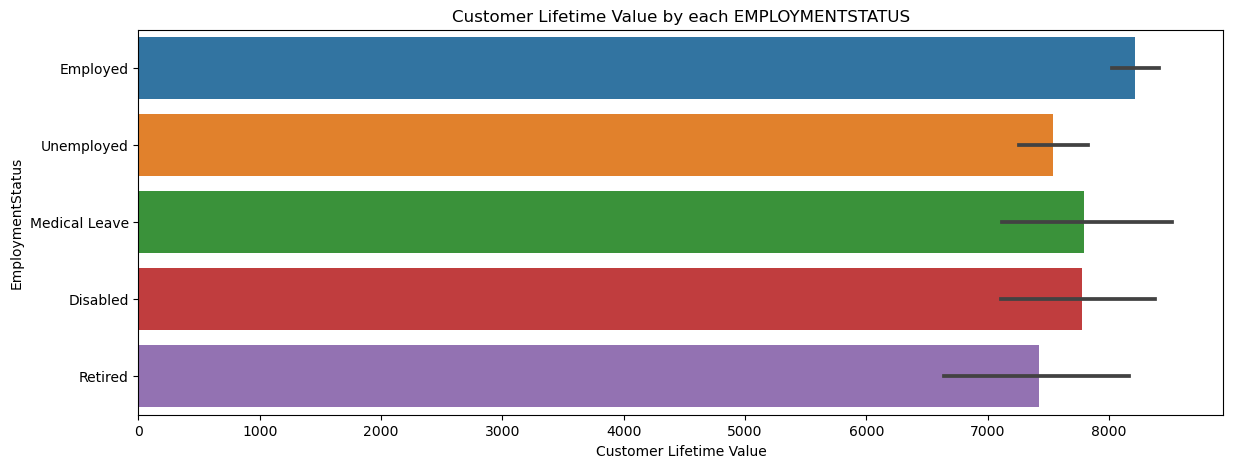

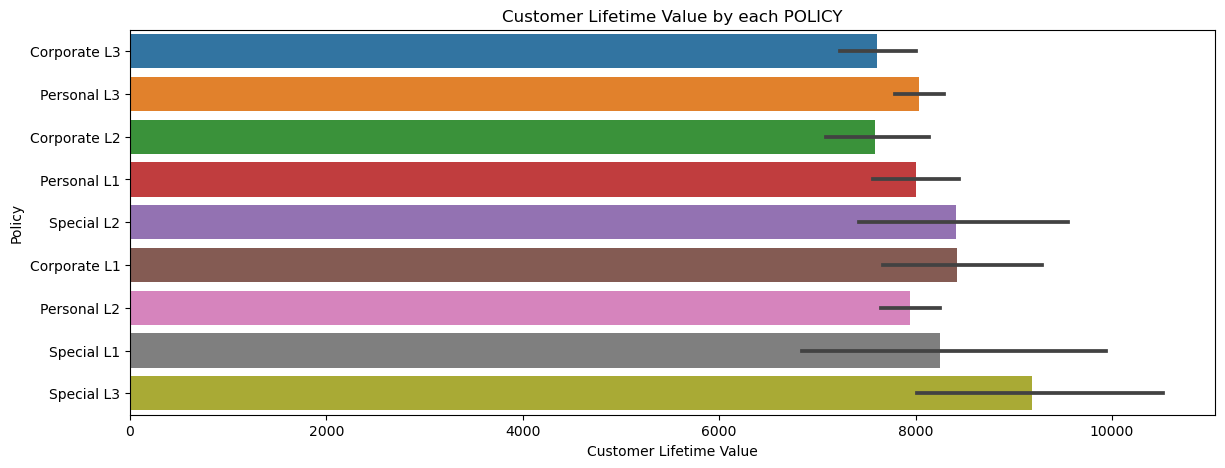

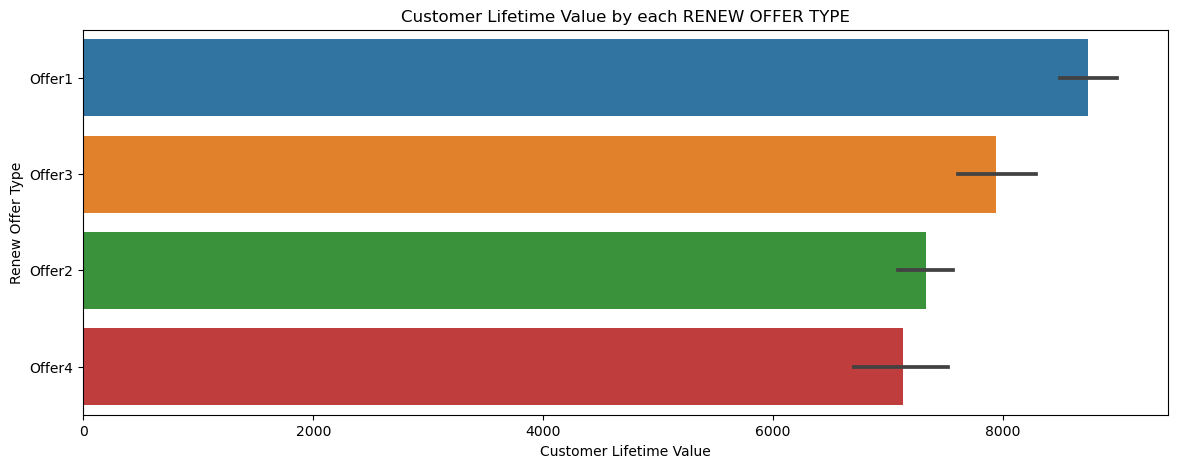

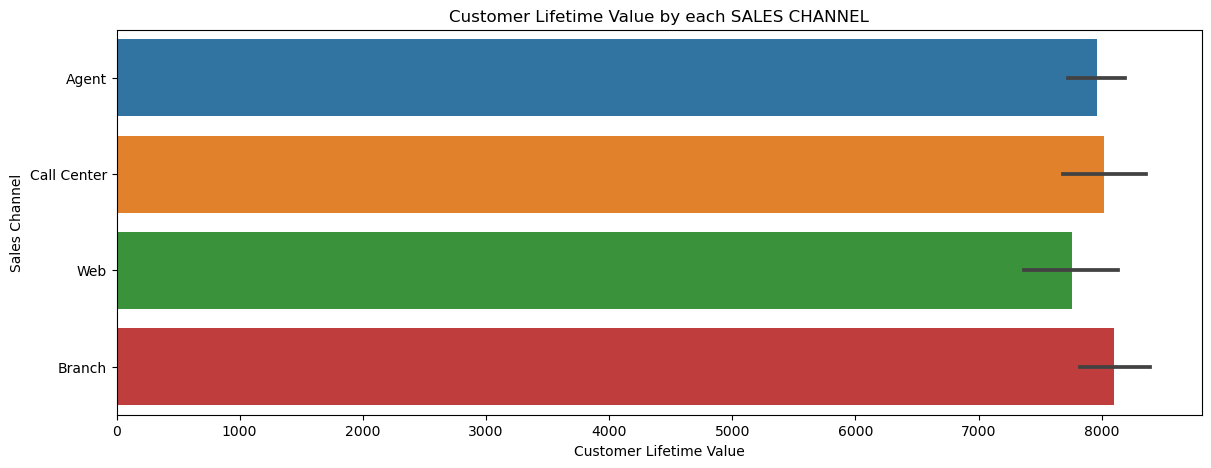

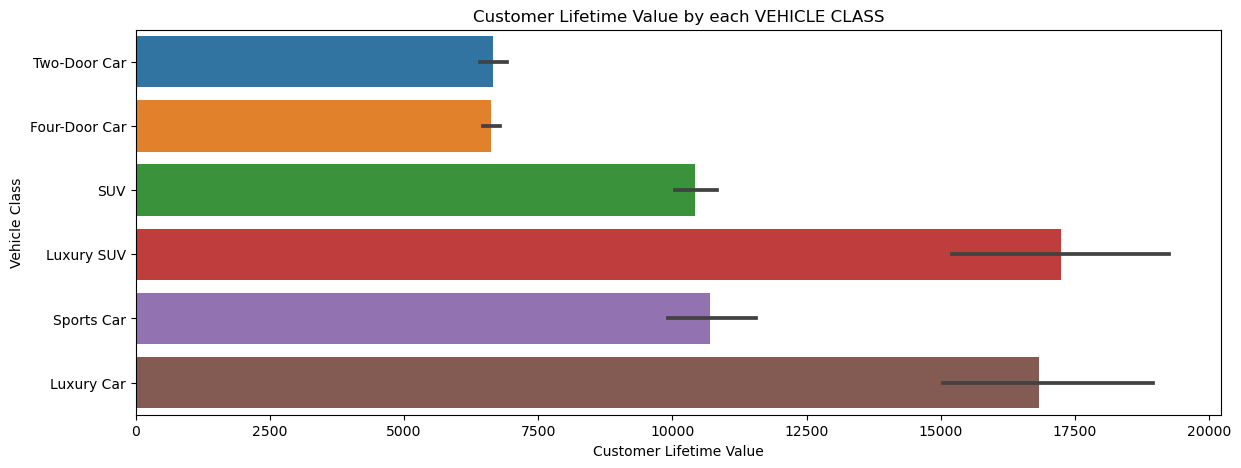

In [13]:
# pertiap kolom pada kolom kategori yang unique value lebih dari 4
for bicat in big_categ:
    # jalankan barplot pada tiap kolom, antara kategorikal dengan numerikal target
    plt.figure(figsize=(14,5))
    sns.barplot(x='Customer Lifetime Value', y=bicat, data=usecase_df)
    plt.title('Customer Lifetime Value by each ' + str(bicat).upper(), fontsize=12)
    plt.show()

- pada coverage, sesuai umumnya semakin banyak cakupan asuransi yang dibayar nasabah maka semakin berdampak pada lifetime
  - mulai dari basic, kemudian yang extend hingga premium
  - karena apabila nasabah membayar dengan coverage extend atau premium, semakin banyak benefit yg didapet
- tidak ada perbedaan pada jenis kelamin
- nasabah yang tinggal di sub-urban atau pinggiran kota justru lebih memberikan lifetime yang lebih baik 
  - diikuti masyarakat perdesaan, dan berikut informasi yang didapat menurut chat gpt
  - kebutuhan asuransi dan cakupan nasabah yang tnggal di suburban dan rural lebih besar, 
    - contohnya pada nasabah perdesaan perlu asuransi untuk peralatan  peternakan dan pertanian, dan yang di suburban untuk rumah dan mobil
    - tingkat persaingan antar asuransi diurban dan rural cenderung lebih rendah yang membuat mereka lebih cenderung bertahan
    - nasabah yang tinggal di suburban dan rural cenderung menawarkan pada tetangga, teman atau sahabat secara mulut ke mulut
- kalau dr status pernikahan, married memerlukan banyak tanggungan maka wajar saja memberikan lifetime
  - karena lifetime disebabkan banyaknya asuransi yang berperan pada tanggungan keluarga itu
- kemudian kelompok nasabah berdasarkan tipe polis terpilih yang paling berdampak pada lifeitme, berasal dari special auto, 
  - sama seperti asumsi sebelumnya, kalau lifetime yang tertinggi berasal dari nasabah yang memerlukan proteksi tambahan pada kepemilikan mobil


Istilah
- Coverage, Cakupan Risiko yang ditanggung penjamin
- Special Auto, polis yang merujuk pada asuransi mobil yang disesuaikan, tergantung pemegang polisnya.    
  - polis special ini mencakup perlindungan tambahan selain polis mobil standar

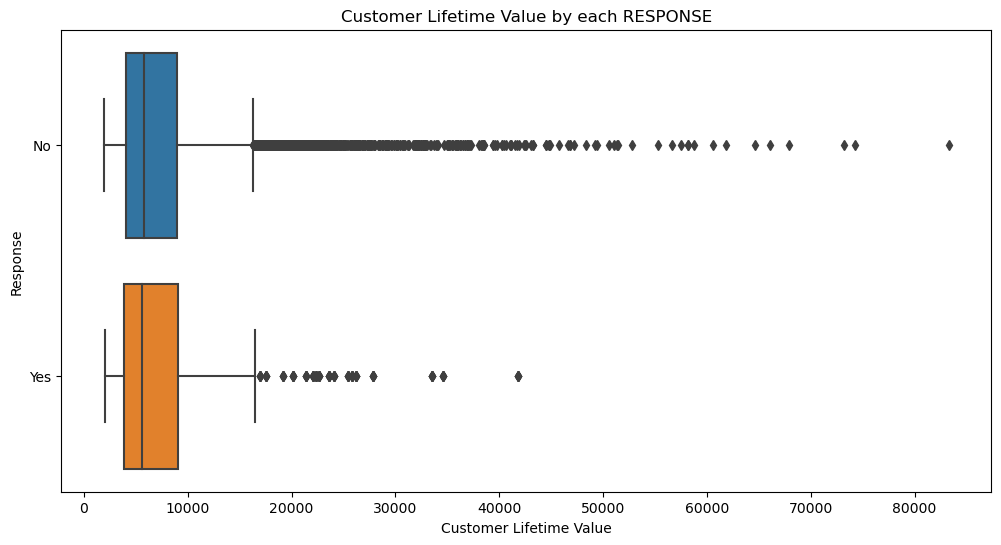

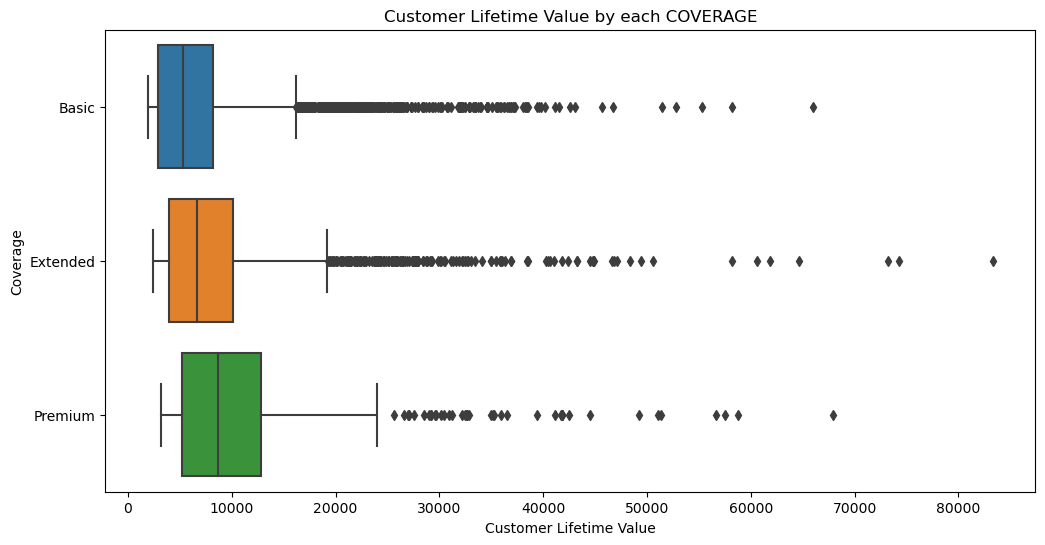

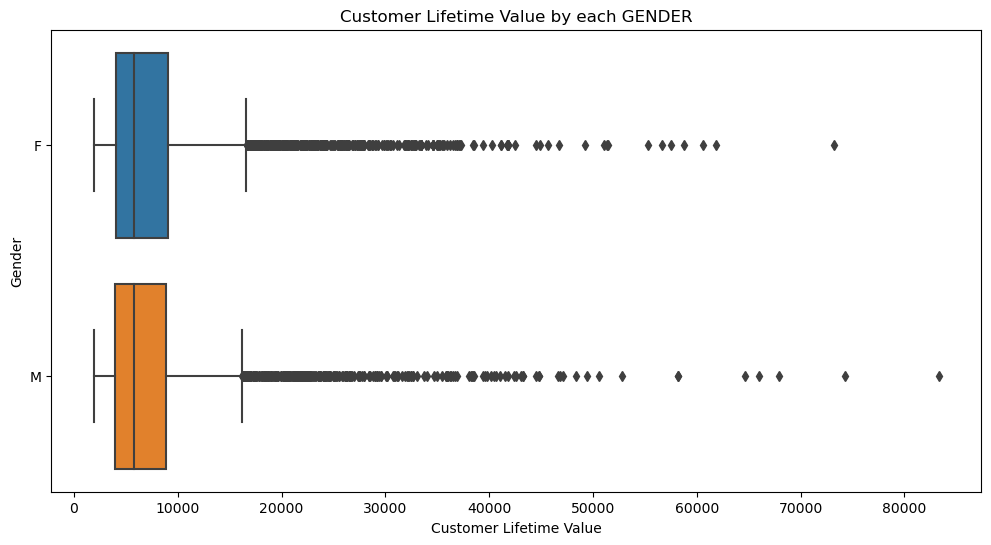

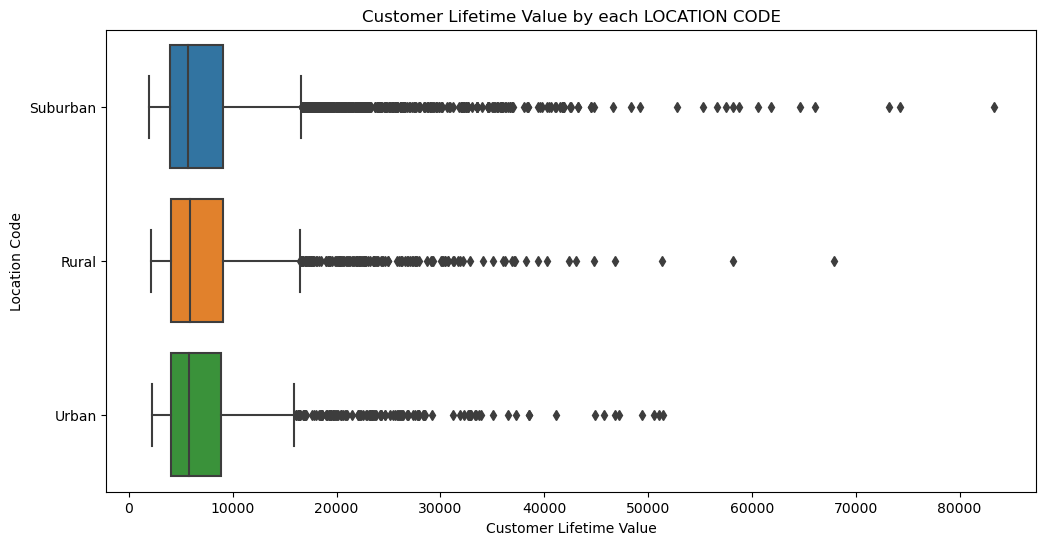

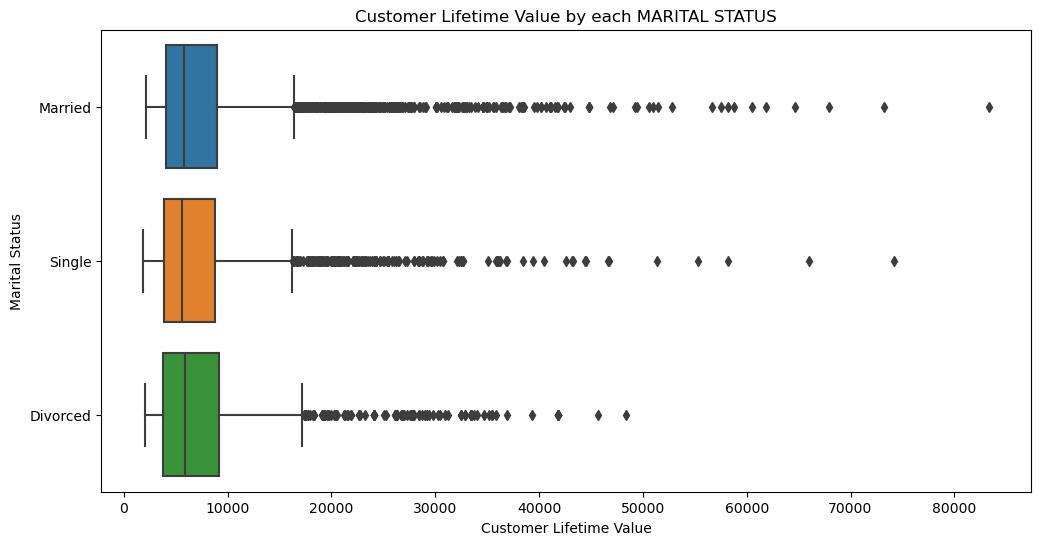

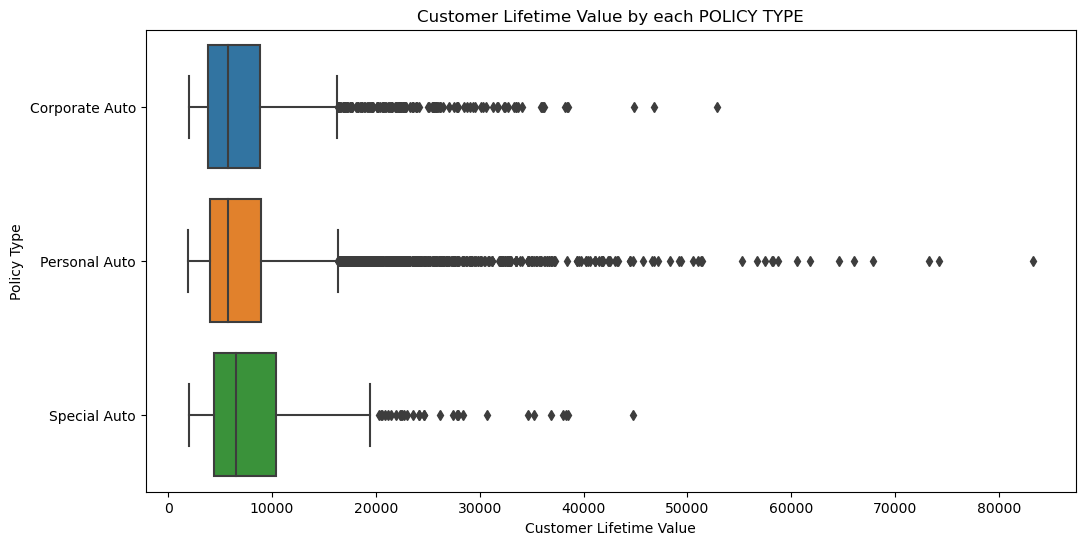

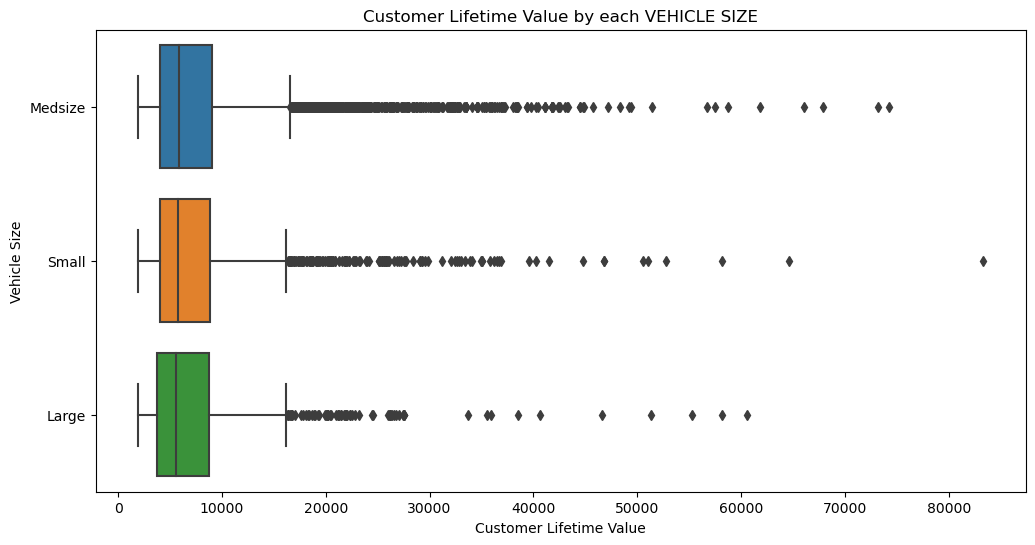

In [75]:
# pertiap kolom pada kolom kategori yang unique value kurang dari 4
for smacat in small_categ:
    # jalankan boxplot pada tiap kolom, antara kategorikal dengan numerikal target
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Customer Lifetime Value', y=smacat, data=usecase_df)
    plt.title('Customer Lifetime Value by each ' + str(smacat).upper(), fontsize=12)
    plt.show()

label encoding untuk mengubah semua kolom menjadi numerik

In [76]:
for col in usecase_df.columns:
    # check id data type is object, except customer
    if usecase_df[col].dtype == 'O' and col != 'Customer' and col != 'Effective To Date':
        # encode all categorical label
        usecase_df[col] = LabelEncoder().fit_transform(usecase_df[col])

heatmap untuk korelasi semua variable (pastikan semua string kategorikal jadi numerik)

hasil dari korelasi semua variabel ke lifetime value customer, bahwaa
- monthly premium auto lah yang paling memberikan dampak pada kesinambungan jalannya bisnis perusahaan
  - karena yang dibayarkan secara auto tiap bulan, sehingga penyedia asuranasi memperoleh masukan yang stabil
- Total Claim Amount, berlaku bagi pelanggan yang jarang mengajukan claim atau mengajukan claim rendah, 
  - dianggap menguntukan karena membayar premi lebih lama dan jarang mengajukan claim yang membuat cashflow lebih sehat 
- Coverage merupakan cakupan dari proteksi yang asuransi, 
  - semakin banyak cakupan proteksinya maka semakin banyak pemasukan yang diterima dari nasabah 

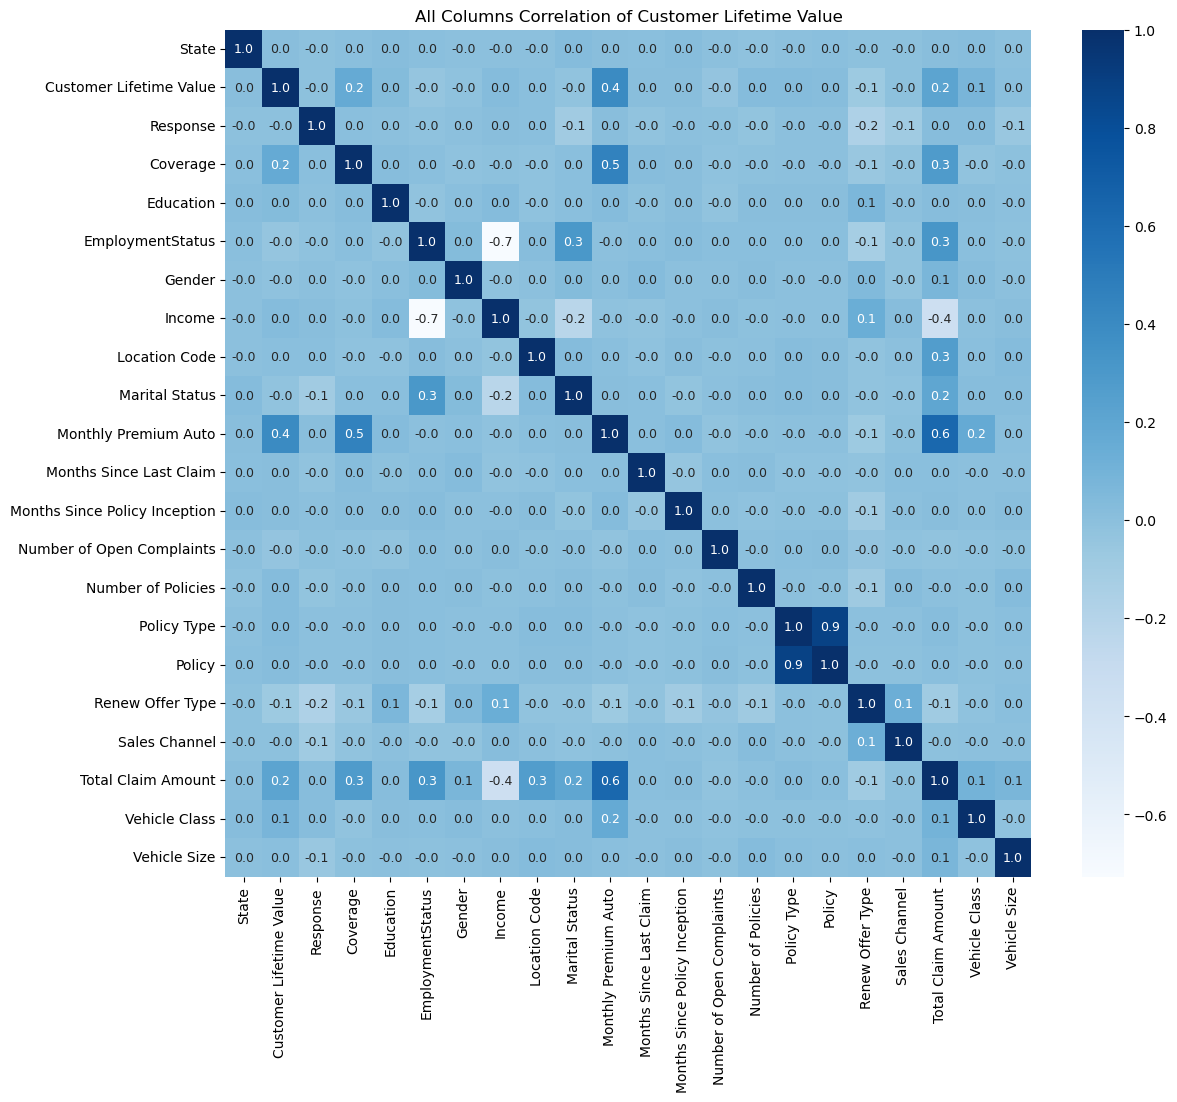

In [77]:
# data untuk perhitungan korelasi, kecuali customer dan effective to date
corr_data = usecase_df.drop(columns=['Customer','Effective To Date'])

# jalankan seaborn heatmap dengan data yang sudah dihitung korelasinya
plt.figure(figsize=(13,11))
sns.heatmap(corr_data.corr(), annot=True, fmt='.1f', cmap='Blues', annot_kws={'size':9})
plt.title('All Columns Correlation of Customer Lifetime Value', fontsize=12)
plt.show()

pembagian data menjadi feature dan target
- untuk data feature, sebaiknya di standarisasi scalenya dengan minmax scaler
- untuk data target, boleh dicoba di logaritma dengan numpy (ada di Trial)

In [78]:
# feature columns dan jalankan minmax preprocessing, kemudian di convert kembali ke dataframe
X = usecase_df.drop(columns=['Customer', 'Customer Lifetime Value', 'Policy Type', 'Policy', 'Income', 'Effective To Date'])
X_scaled = X.copy()
X_scaled = MinMaxScaler().fit_transform(X_scaled)
X = pd.DataFrame(data=X_scaled, columns=X.columns)

# target columns
y = usecase_df['Customer Lifetime Value']
# logarithmed target columns for Next Trial 
y = np.log(y)


pembagian data menjadi training (70% atau 75%) dan testing (30% atau 25%)

In [79]:
# pembagian data menjadi train dan test dengan train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0, shuffle=True)

print(f'Training Data {X_train.shape[0]} Rows {X_train.shape[1]} Columns with {y_train.shape[0]} Labels')
print(f'Testing Data {X_test.shape[0]} Rows {X_test.shape[1]} Columns with {y_test.shape[0]} Labels')

Training Data 6074 Rows 18 Columns with 6074 Labels
Testing Data 2025 Rows 18 Columns with 2025 Labels


training menggunakan regression: linear regression, ridge regression, lasso regression, rf regressor, d tree regressor
ukur performa menggunakan metric r2, mean squared error, mean squared error (rmse), mean absoulte error 

rmse mean squared error (default squared nya True) = mean_squared_error(label, pred, squared=False) 

In [80]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linpred = linreg.predict(X_test)

print(f"""Linear Regression Score
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, linpred)):.2f}
Mean Absolute Error     : {mean_absolute_error(y_test, linpred):.2f}
R2 Score                : {r2_score(y_test, linpred):.2f}""")

Linear Regression Score
Root Mean Squared Error : 0.56
Mean Absolute Error     : 0.44
R2 Score                : 0.24


In [83]:
# Ridge CV Regression
ridreg = RidgeCV(alphas=[1, 0.1, 0.01, 0.005], normalize=True)
ridreg.fit(X_train, y_train)
ridpred = ridreg.predict(X_test)

print(f"""Ridge CV Regression Score
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, ridpred)):.2f}
Mean Absolute Error     : {mean_absolute_error(y_test, ridpred):.2f}
R2 Score                : {r2_score(y_test, ridpred):.2f}""")

Ridge CV Regression Score
Root Mean Squared Error : 0.56
Mean Absolute Error     : 0.44
R2 Score                : 0.24


In [84]:
# Lasso CV Regression
lasreg = LassoCV(alphas=[1, 0.1, 0.01, 0.005], random_state=1)
lasreg.fit(X_train, y_train)
laspred = lasreg.predict(X_test)

print(f"""Lasso CV Regression Score
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, laspred)):.2f}
Mean Absolute Error     : {mean_absolute_error(y_test, laspred):.2f}
R2 Score                : {r2_score(y_test, laspred):.2f}""")

Lasso CV Regression Score
Root Mean Squared Error : 0.57
Mean Absolute Error     : 0.44
R2 Score                : 0.23


In [82]:
# Decision Tree Regressor
treereg = DecisionTreeRegressor(criterion='squared_error')
treereg.fit(X_train, y_train)
treepred = treereg.predict(X_test)

print(f"""Lasso CV Regression Score
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, treepred)):.2f}
Mean Absolute Error     : {mean_absolute_error(y_test, treepred):.2f}
R2 Score                : {r2_score(y_test, treepred):.2f}""")

Lasso CV Regression Score
Root Mean Squared Error : 0.27
Mean Absolute Error     : 0.11
R2 Score                : 0.83


In [81]:
# Random Forest Regressor
raforeg = RandomForestRegressor(criterion='squared_error')
raforeg.fit(X_train, y_train)
rafopred = raforeg.predict(X_test)

print(f"""Lasso CV Regression Score
Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, rafopred)):.2f}
Mean Absolute Error     : {mean_absolute_error(y_test, rafopred):.2f}
R2 Score                : {r2_score(y_test, rafopred):.2f}""")

Lasso CV Regression Score
Root Mean Squared Error : 0.19
Mean Absolute Error     : 0.09
R2 Score                : 0.91


compare semua score dari model regresi dengan tabular

bandingkan berdasarkan nilai R2 pada tiap model

In [85]:
linr2 = r2_score(y_test, linpred)
ridr2 = r2_score(y_test, ridpred)
lasr2 = r2_score(y_test, laspred)
treer2 = r2_score(y_test, treepred)
rafor2 = r2_score(y_test, rafopred)

regres_score = pd.DataFrame(data={'Model':['Linear Regression', 'Ridge CV Regression', 'Lasso CV Regression', 
                                           'Decision Tree Regressor', 'Random Forest Regressor'],
                                  'Score':[linr2, ridr2, lasr2, treer2, rafor2]})
regres_score.sort_values(by='Score', ascending=False, inplace=True)
# round artinya dibulankan jadi 2 angka dibelakang koma
regres_score.round(2)

,Model,Score
4,Random Forest Regressor,0.91
3,Decision Tree Regressor,0.83
1,Ridge CV Regression,0.24
0,Linear Regression,0.24
2,Lasso CV Regression,0.23


liat feature importance untuk mengetahui kolom terpenting apa aja yang mempengaruhi masing-masing model diatas 

kedua feature yang sering muncul 2 baris teratas dari semua model
- Monthly Premium Auto, seperti penjelasan sebelumnya karena setiap bulan penyedia asuransi mendapat pemasukan tiap bulan secara otomatis dari setiap nasabah
- Number of Policies, jumlah polis jika sesuai dengan yang dibutuhkan nasabah juga berdampak pada kelangsungan bisnisnya

In [25]:
# Feature Coefficient in Linear Regression menggunakan coef_
linimp = pd.DataFrame(data={'Column':X.columns, 'Feature Importance':linreg.coef_})
linimp.sort_values(by='Feature Importance', ascending=False, inplace=True)
# round artinya dibulankan jadi 3 angka dibelakang koma
linimp.round(3)

,Column,Feature Importance
8,Monthly Premium Auto,2.087
12,Number of Policies,0.431
3,Education,0.062
2,Coverage,0.055
16,Vehicle Class,0.051
9,Months Since Last Claim,0.039
6,Location Code,0.033
17,Vehicle Size,0.012
0,State,-0.010
10,Months Since Policy Inception,-0.017


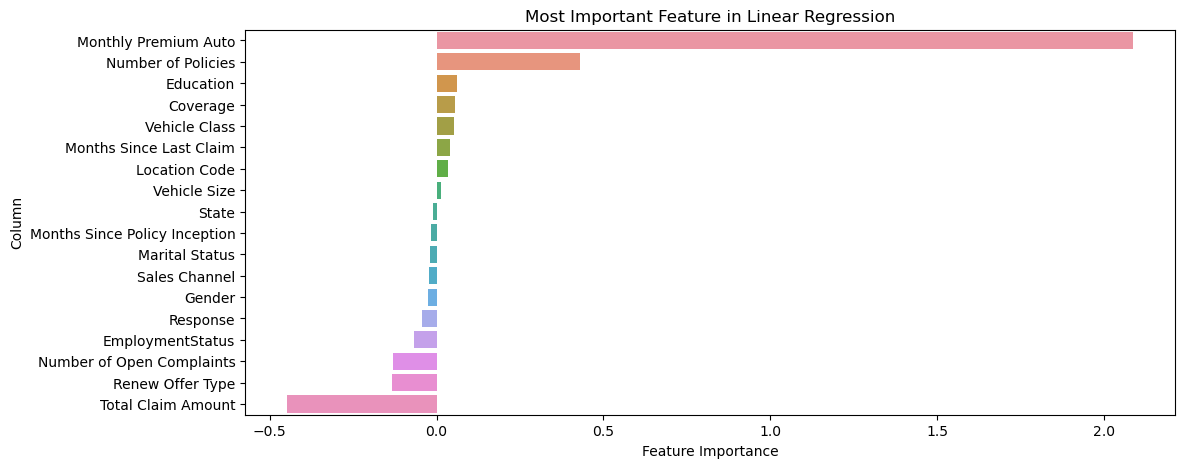

In [26]:
# Most Important Feature in Linear Regression 
plt.figure(figsize=(12,5))
sns.barplot(x='Feature Importance', y='Column', data=linimp)
plt.title('Most Important Feature in Linear Regression',fontsize=12)
plt.show()

In [27]:
# Feature Coefficient in Ridge CV Regression menggunakan coef_
ridimp = pd.DataFrame(data={'Column':X.columns, 'Feature Importance':ridreg.coef_})
ridimp.sort_values(by='Feature Importance', ascending=False, inplace=True)
ridimp.round(3)

,Column,Feature Importance
8,Monthly Premium Auto,2.062
12,Number of Policies,0.429
3,Education,0.061
2,Coverage,0.057
16,Vehicle Class,0.052
9,Months Since Last Claim,0.038
6,Location Code,0.031
17,Vehicle Size,0.012
0,State,-0.010
10,Months Since Policy Inception,-0.016


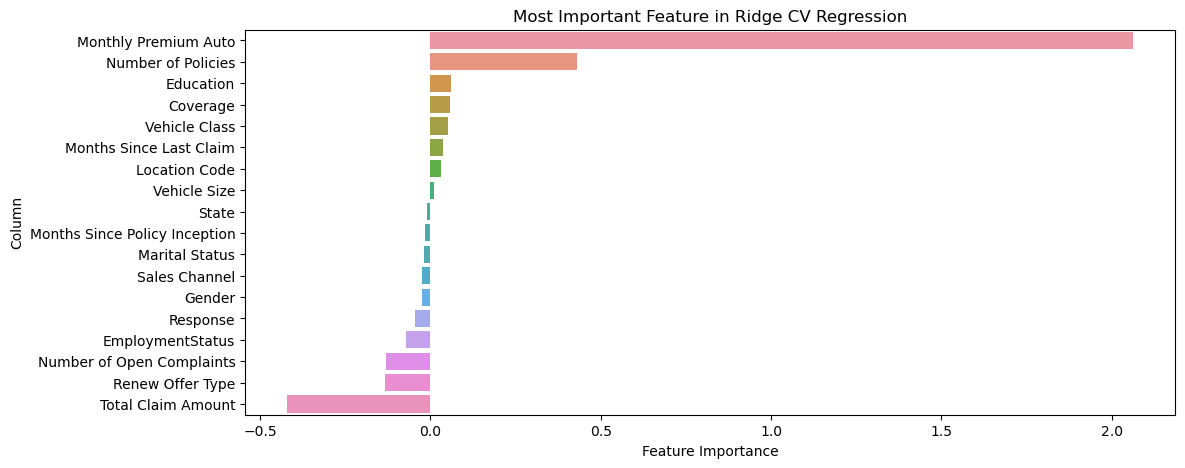

In [28]:
# Most Important Feature in Ridge CV Regression
plt.figure(figsize=(12,5))
sns.barplot(x='Feature Importance', y='Column', data=ridimp)
plt.title('Most Important Feature in Ridge CV Regression',fontsize=12)
plt.show()

In [29]:
# Feature Coefficient in Lasso CV Regression menggunakan coef_
lasimp = pd.DataFrame(data={'Column':X.columns, 'Feature Importance':lasreg.coef_})
lasimp.sort_values(by='Feature Importance', ascending=False, inplace=True)
lasimp.round(3)

,Column,Feature Importance
8,Monthly Premium Auto,1.678
12,Number of Policies,0.380
2,Coverage,0.059
16,Vehicle Class,0.035
3,Education,0.019
0,State,-0.000
10,Months Since Policy Inception,-0.000
15,Total Claim Amount,-0.000
14,Sales Channel,-0.000
11,Number of Open Complaints,-0.000


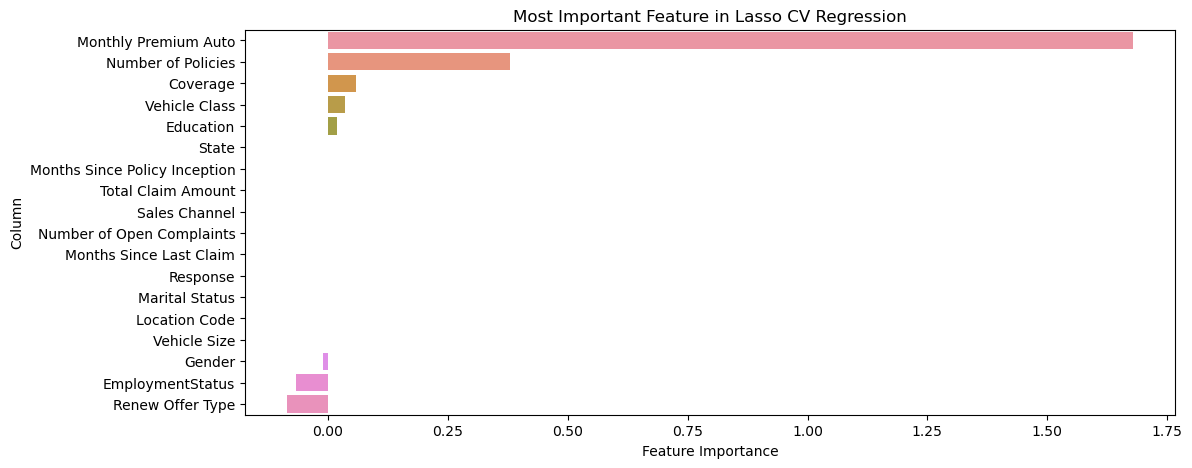

In [30]:
# Most Important Feature in Lasso CV Regression 
plt.figure(figsize=(12,5))
sns.barplot(x='Feature Importance', y='Column', data=lasimp)
plt.title('Most Important Feature in Lasso CV Regression',fontsize=12)
plt.show()

In [31]:
# Feature Importance in Decision Tree Regression menggunakan feature_importances_
treeimp = pd.DataFrame(data={'Column':X.columns, 'Feature Importance':treereg.feature_importances_})
treeimp.sort_values(by='Feature Importance', ascending=False, inplace=True)
treeimp.round(3)

,Column,Feature Importance
12,Number of Policies,0.678
8,Monthly Premium Auto,0.220
15,Total Claim Amount,0.017
10,Months Since Policy Inception,0.016
2,Coverage,0.013
9,Months Since Last Claim,0.013
3,Education,0.007
4,EmploymentStatus,0.007
14,Sales Channel,0.004
13,Renew Offer Type,0.004


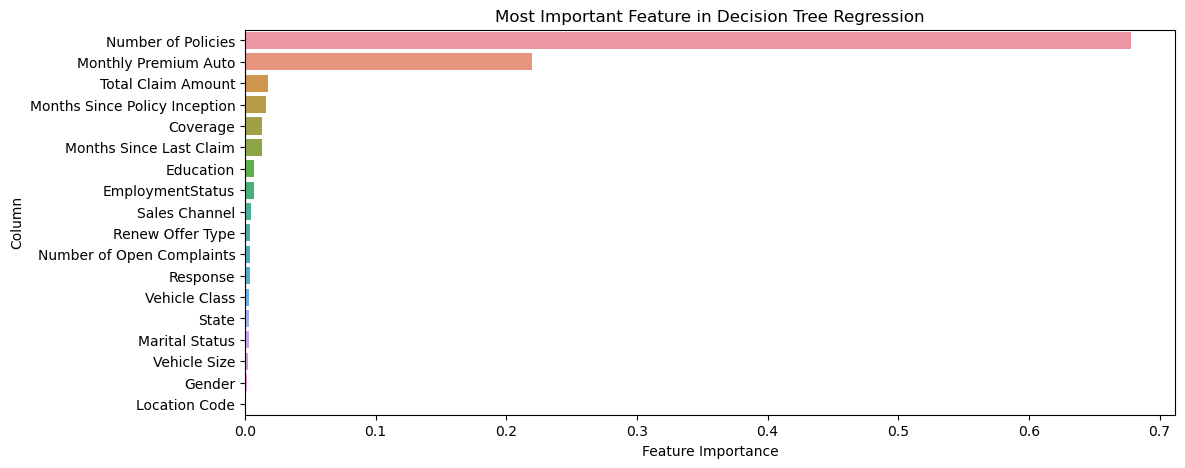

In [32]:
# Most Important Feature in Decision Tree Regression
plt.figure(figsize=(12,5))
sns.barplot(x='Feature Importance', y='Column', data=treeimp)
plt.title('Most Important Feature in Decision Tree Regression',fontsize=12)
plt.show()

In [33]:
# Feature Importance Feature in Random Forest Regression menggunakan feature_importances_
rafoimp = pd.DataFrame(data={'Column':X.columns, 'Feature Importance':raforeg.feature_importances_})
rafoimp.sort_values(by='Feature Importance', ascending=False, inplace=True)
rafoimp.round(3)

,Column,Feature Importance
12,Number of Policies,0.679
8,Monthly Premium Auto,0.227
15,Total Claim Amount,0.016
10,Months Since Policy Inception,0.015
9,Months Since Last Claim,0.015
4,EmploymentStatus,0.008
3,Education,0.006
0,State,0.005
13,Renew Offer Type,0.004
14,Sales Channel,0.004


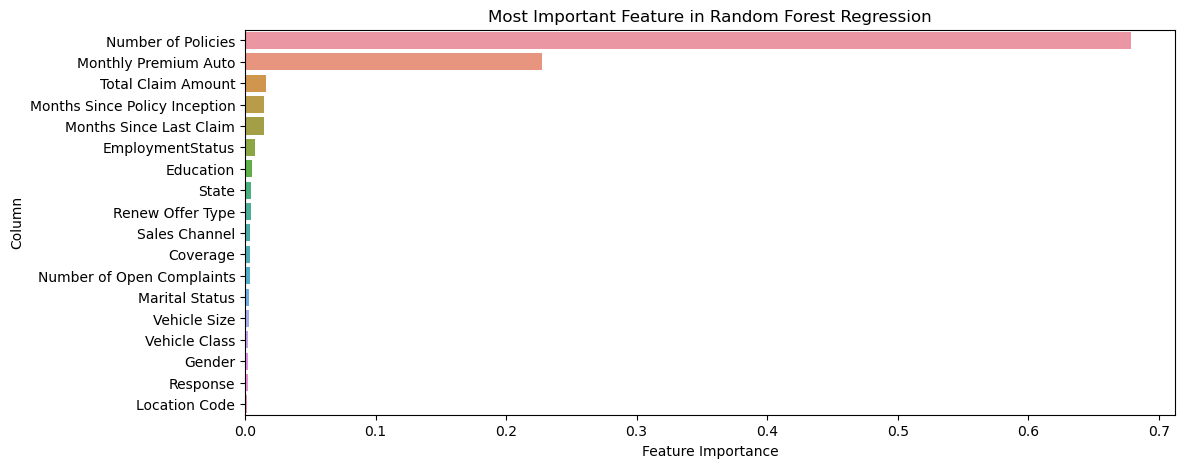

In [34]:
# Most Important Feature in Random Forest Regression
plt.figure(figsize=(12,5))
sns.barplot(x='Feature Importance', y='Column', data=rafoimp)
plt.title('Most Important Feature in Random Forest Regression',fontsize=12)
plt.show()

jalankan model inference

In [119]:
# dataset for model inference in production
realcase_df = pd.read_csv('squark_automotive_CLV_production_data.csv')

In [87]:
realcase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       1035 non-null   object 
 1   State                          1035 non-null   object 
 2   Response                       1035 non-null   object 
 3   Coverage                       1035 non-null   object 
 4   Education                      1035 non-null   object 
 5   Effective To Date              1035 non-null   object 
 6   EmploymentStatus               1035 non-null   object 
 7   Gender                         1035 non-null   object 
 8   Income                         1035 non-null   int64  
 9   Location Code                  1035 non-null   object 
 10  Marital Status                 1035 non-null   object 
 11  Monthly Premium Auto           1035 non-null   int64  
 12  Months Since Last Claim        1035 non-null   i

In [121]:
realcase_df[realcase_df.duplicated()].count()

Customer                         0
State                            0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [120]:
realcase_df.isnull().sum()

Customer                         0
State                            0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [122]:
realcase_df.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,36200.622222,93.833816,15.296618,47.415459,0.346860,2.984541,454.624993
std,30428.327030,34.627633,9.970359,28.584926,0.879861,2.389887,318.034652
min,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,2.823303
25%,0.000000,69.000000,6.000000,22.000000,0.000000,1.000000,290.680278
50%,30064.000000,85.000000,14.000000,47.000000,0.000000,2.000000,390.498822
75%,60926.000000,110.000000,24.000000,72.000000,0.000000,4.000000,561.600000
max,99845.000000,286.000000,35.000000,99.000000,5.000000,9.000000,2452.894264


In [123]:
realcase_df.describe(include='object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035
unique,1035,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,FH77504,California,No,Basic,Bachelor,1/26/2011,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize
freq,1,774,900,637,318,28,619,541,681,570,735,333,428,390,511,753


In [88]:
realcase_df[['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception',
             'Number of Open Complaints', 'Number of Policies']].head(20)

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,51643,283,16,43,0,1
1,46402,113,7,2,0,1
2,92044,132,7,77,0,3
3,16040,96,29,93,0,2
4,0,135,12,84,4,2
5,17622,65,1,36,1,3
6,0,188,5,61,4,1
7,12430,73,22,13,0,4
8,58414,210,7,24,2,1
9,17257,70,1,88,0,2


pemrosesan dan persiapan data dengan cara yang sama dengan cara pada fase data training
- data realcase nya di duplicate terlebih dulu, karena data aslinya tinggal dimasukin label
- bedanya ada beberapa kolom yang tipe datanya float, ternyata di data realnya integer
- dan data nya lebih bersih karena tidak ada missing value dan duplicate value

In [89]:
# data khusus di preprocess, karena data aslinya tinggal dimasukin label
X_real = realcase_df.copy()

# tidak perlu menghapus data kosong berdasarkan baris, karena tidak ada data kosong
# X_real.dropna(axis=0, how='any', inplace=True)

# transform effective to date dari object ke datetime
X_real['Effective To Date'] = pd.to_datetime(X_real['Effective To Date'])
# mengubah format tanggal dari mm/dd/yyyy menjadi dd/mm/yyyy
X_real['Effective To Date'] = X_real['Effective To Date'].dt.strftime('%d/%m/%Y')

# transform months since last claim, months since policy inception, number of open complaints, number of policies dari float ke integer
# for flocol in ['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']:
#     X_real[flocol] = X_real[flocol].astype(int)
# karena datanya udah integer, ga ada yang flaot dari sini

# encoding all categorical column, to transform string to numeric column
for col in X_real.columns:
    # check id data type is object, except customer
    if X_real[col].dtype == 'O' and col != 'Customer' and col != 'Effective To Date':
        # encode all categorical label
        X_real[col] = LabelEncoder().fit_transform(X_real[col])

# feature columns and run Minmax Preprocessing
X_real = X_real.drop(columns=['Customer', 'Policy Type', 'Policy', 'Income', 'Effective To Date'])
X2_scaled = X_real.copy()
X2_scaled = MinMaxScaler().fit_transform(X2_scaled)
X_real = pd.DataFrame(data=X2_scaled, columns=X_real.columns)

jalankan model yang sebelumnya dibuat pada proses modelling, 
- namun kondisi value variabel target masih berbentuk log, maka menggunakan exponen untuk mengembalikan nilai ke kondisi semula
- kedua function sama2 berasal dari numpy

setelah itu dibuat kolom baru dan memasukan hasil dari variabel target ke data baru yang production
- dengan posisi yang sama seperti data training

In [90]:
# masukan nilai prediksi customer lifetiem value pada variabel baru
cltv_pred = raforeg.predict(X_real)
# mengembalikan nilai asli dari hasil logaritma numpy dengan exponensial numpy
cltv_pred = np.exp(cltv_pred).round(2)

# masukan kolom hasil prediksi customer lifetime value baru ke data baru
realcase_df.insert(2, 'Customer Lifetime Value', cltv_pred)
realcase_df.head(20)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,FH77504,California,11370.93,Yes,Premium,Bachelor,1/24/2011,Employed,F,51643,...,43,0,1,Personal Auto,Personal L3,Offer2,Agent,1358.400000,Luxury Car,Medsize
1,XK87182,Oregon,4637.10,No,Premium,College,1/25/2011,Employed,F,46402,...,2,0,1,Personal Auto,Personal L3,Offer1,Agent,476.385575,Four-Door Car,Medsize
2,HB17438,Washington,10670.00,No,Extended,Bachelor,2/21/2011,Employed,M,92044,...,77,0,3,Personal Auto,Personal L1,Offer4,Web,617.288574,SUV,Medsize
3,DH18269,Arizona,15248.41,No,Extended,College,1/13/2011,Medical Leave,M,16040,...,93,0,2,Personal Auto,Personal L3,Offer1,Branch,611.476898,Two-Door Car,Medsize
4,DP19820,Oregon,20020.90,No,Extended,College,1/15/2011,Unemployed,M,0,...,84,4,2,Personal Auto,Personal L2,Offer2,Branch,980.528170,SUV,Small
5,IK64989,Washington,4437.17,Yes,Basic,Bachelor,1/2/2011,Retired,M,17622,...,36,1,3,Personal Auto,Personal L2,Offer1,Agent,312.000000,Four-Door Car,Medsize
6,MP85571,Arizona,6632.44,No,Premium,Bachelor,2/20/2011,Unemployed,F,0,...,61,4,1,Personal Auto,Personal L2,Offer3,Agent,2156.011022,SUV,Medsize
7,VO29645,Oregon,5191.65,Yes,Basic,High School or Below,2/26/2011,Medical Leave,M,12430,...,13,0,4,Personal Auto,Personal L3,Offer2,Call Center,350.400000,Four-Door Car,Medsize
8,GP83239,California,8923.01,Yes,Extended,College,1/14/2011,Employed,M,58414,...,24,2,1,Personal Auto,Personal L3,Offer2,Agent,1008.000000,Luxury SUV,Small
9,GQ21970,Nevada,10620.72,No,Basic,Bachelor,1/28/2011,Disabled,F,17257,...,88,0,2,Personal Auto,Personal L2,Offer1,Call Center,551.132139,Four-Door Car,Small


Bandingkan Korelasi dari Number of Policies, Monthly Premium Auto dan Total Claim Amount terhadap Customer Lifetime Value

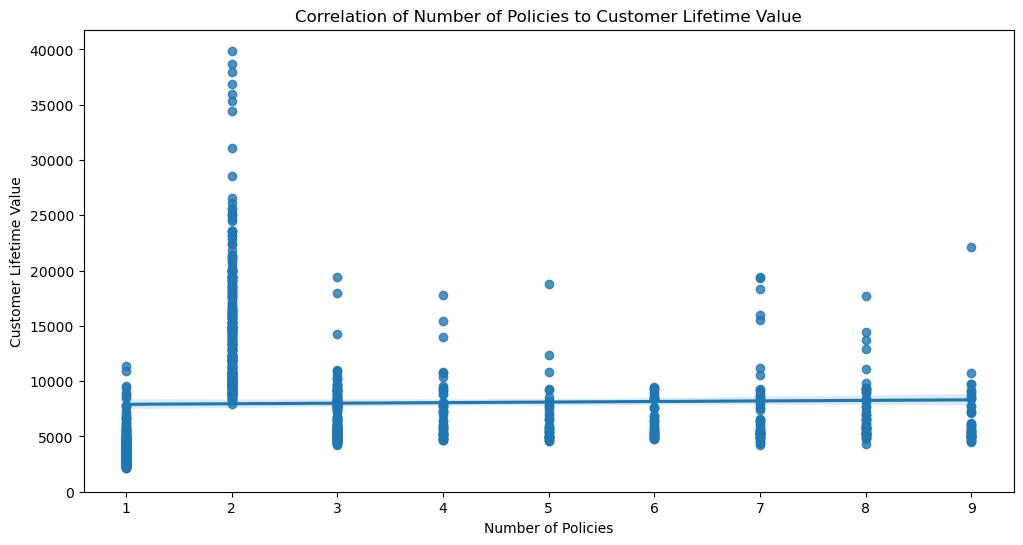

In [114]:
# Korelasi antara Number of Policies dengan Customer Lifetime Value
plt.figure(figsize=(12,6))
sns.regplot(x='Number of Policies', y='Customer Lifetime Value', data=realcase_df)
plt.ylim(0,)
plt.title('Correlation of Number of Policies to Customer Lifetime Value')
plt.show()

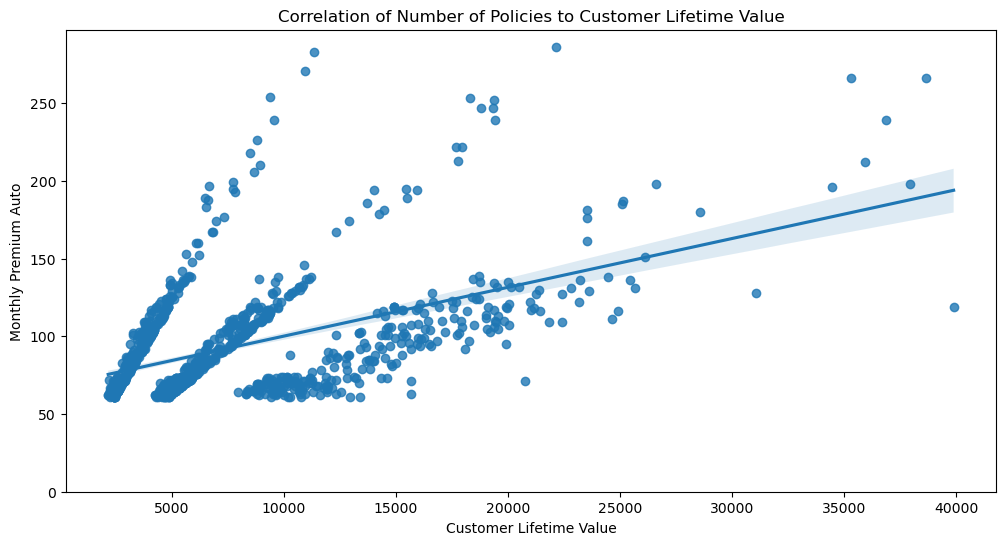

In [111]:
# Korelasi antara Monthly Premium Auto dengan Customer Lifetime Value
plt.figure(figsize=(12,6))
sns.regplot(x='Customer Lifetime Value', y='Monthly Premium Auto', data=realcase_df)
plt.ylim(0,)
plt.title('Correlation of Number of Policies to Customer Lifetime Value')
plt.show()

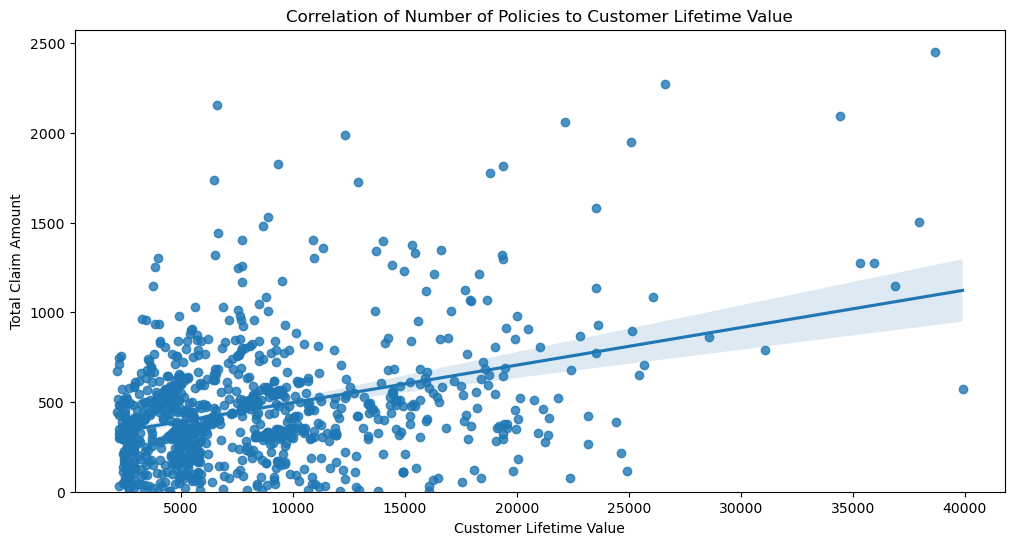

In [112]:
# Korelasi antara Total Claim Amount dengan Customer Lifetime Value
plt.figure(figsize=(12,6))
sns.regplot(x='Customer Lifetime Value', y='Total Claim Amount', data=realcase_df)
plt.ylim(0,)
plt.title('Correlation of Number of Policies to Customer Lifetime Value')
plt.show()